# Geometric interpretation of PCA

In [48]:
import numpy as np
import matplotlib.pyplot as plt

Define the unit vector
$\mathbf{v}_1 = \begin{pmatrix} \cos(\theta_1) \\ \sin(\theta_1)\end{pmatrix}$
where $\theta = \pi/6$ and a unit vector $\mathbf{v}_2 \perp \mathbf{v}_1$.

In [91]:
theta = np.pi/6
v1 = np.array([np.cos(theta), np.sin(theta)])
v2 = np.array([-np.sin(theta), np.cos(theta)])

Define the point $\mathbf{b} = \begin{pmatrix} 20 \\ 30\end{pmatrix}$

In [92]:
b = np.array([20,30])

Generate $n = 1000$ points $\mathbf{x}_i$ according to the formula:

$\mathbf{x}_i = \mathbf{b} + r_{1,i} \rho_1 \mathbf{v}_1 + r_{2,i} \rho_2 \mathbf{v}_2$

where $\rho_1 = 12$, $\rho_2 = 3$ and the $r_{i,j}$ are real numbers independently generated according to a normal distribution. 

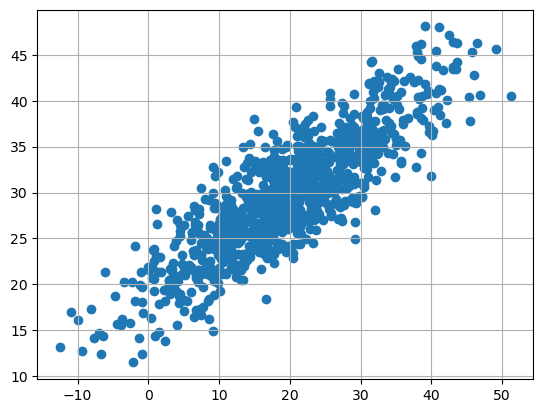

In [98]:
n = 1000 #number of samples
rho = np.array([12,3])

np.random.seed(0)

r = np.random.randn(2,n)
X = b[:,np.newaxis] + rho[0]*np.outer(v1,r[0,:]) + rho[1]*np.outer(v2,r[1,:])

plt.scatter(X[0,:], X[1,:])
plt.grid()

Plot the generated numbers in a plane, showing the directions $\mathbf{v}_1$ and $\mathbf{v}_2$, rescaled by $\rho_1$ and $\rho_2$, respectivaly.

(-15.681102808190511, 54.444617890761435, 9.650938054269844, 49.92921008458783)

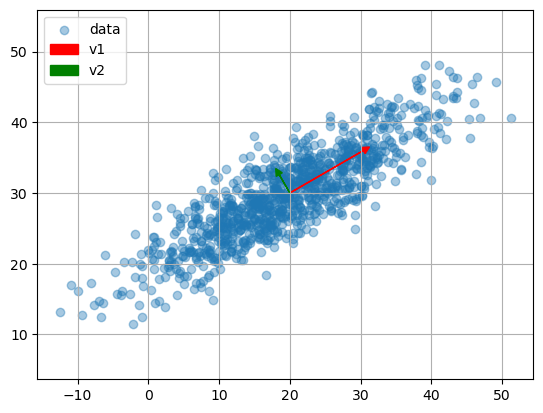

In [100]:
# fill here
# hint: use `matplotlib.pyplot.arrow(x, y, dx, dy, **kwargs)` to plot the directions
#       use `matplotlib.pyplot.scatter(x, y, ..., **kwargs)` to plot the data

plt.scatter(X[0,:], X[1,:],label='data',alpha=0.4)
plt.arrow(b[0], b[1], rho[0]*v1[0], rho[0]*v1[1], head_width=1, head_length=1, fc='r', ec='r',label='v1')
plt.arrow(b[0], b[1], rho[1]*v2[0], rho[1]*v2[1], head_width=1, head_length=1, fc='g', ec='g',label='v2')
plt.grid()
plt.legend()
plt.axis('equal')

Perform PCA on the matrix $X$:

$\boldsymbol{\mu} = \frac{1}{n} \sum_{i=1}^{n} \mathbf{x}_i$

$\overline{X} = X - \boldsymbol{\mu} [1,\dots,1]$

$\overline{X} = U \Sigma V^T$

In [101]:
X_mean = np.mean(X,axis=1)
U,S,Vt = np.linalg.svd(X - X_mean.reshape(-1,1),full_matrices=False)

Plot the first two singular vectors, rescaled by the root of the sample variance:

${\sqrt{\frac{\sigma_1^2}{(n - 1)}}}{\mathbf{u}_1}, {\sqrt{\frac{\sigma_2^2}{(n - 1)}}}{\mathbf{u}_2}$

(-15.681102808190511, 54.444617890761435, 9.650938054269844, 49.92921008458783)

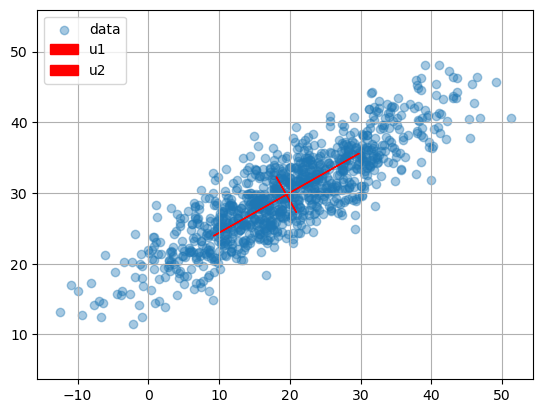

In [108]:
u1 = U[:,0]
u2 = U[:,1]

r = S/np.sqrt(n-1) # rescaling factor
plt.scatter(X[0,:], X[1,:],label='data',alpha=0.4)
plt.arrow(X_mean[0]-r[0]*u1[0], X_mean[1]-r[0]*u1[1], 2*r[0]*u1[0], 2*r[0]*u1[1], color='red',label='u1')
plt.arrow(X_mean[0]-r[1]*u2[0], X_mean[1]-r[1]*u2[1], 2*r[1]*u2[0], 2*r[1]*u2[1], color='red',label='u2')
plt.grid()
plt.legend()
plt.axis('equal')

The vectors are in the same direction, SVD doesn't always give the right sign

In [109]:
u1,u2,v1,v2

(array([-0.87010612, -0.49286442]),
 array([-0.49286442,  0.87010612]),
 array([0.8660254, 0.5      ]),
 array([-0.5      ,  0.8660254]))

Compute the principal components of the data:

$\Phi = U^T \overline{X}$

In [110]:
Phi = U.T @ (X - X_mean.reshape(-1,1))

Make a scatterplot of the two first principal components ($\phi_1$, $\phi_2$)

(-37.147668699477336,
 39.507156226458726,
 -9.897213123605663,
 10.395849652427222)

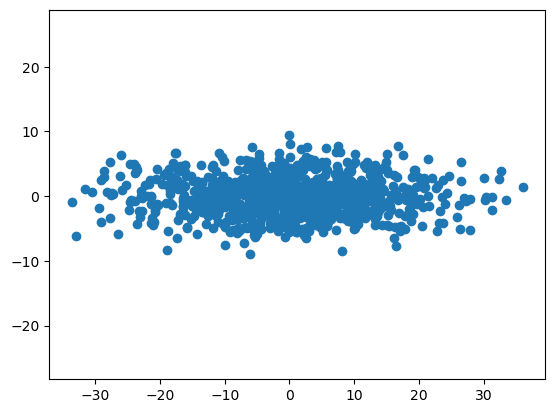

In [113]:
plt.scatter(Phi[0,:], Phi[1,:],label='data')
plt.axis('equal')